In [28]:
import numpy as np
import pandas as pd
import Funciones_sismos as BN
import matplotlib.pyplot as plt

<img src='./images/Espectro_resp_ASCE.png' width='400px' height='300px'>

In [29]:
Risk_category = 1
Seismic_design_category = 'D'

#Datos para EEUU
Tl = 0 #input (Ver en mapas 22-14 y 22-17)
Fa = 4  #Ver en ASCE tabla 11.4-1, realizar interpolación si es necesario
Ss = 0 #input
limite = 5

#Datos para Ecuador
zona = 5
suelo = 'C'
fip = 0.9
fie = 0.8
fa = 1.2
fd = 1.11
fs = 1.11
n = 2.48
z = 0.4     #Para un TR475 años
Imp = 1.3   #Importancia
rr = 1
R = 7
Ss = n*z

In [30]:
Spec, SpecI, Tmp = BN.Spec_NEC(n, z, fa, fd, fs, rr, Imp, R, fip, fie)

S1 = None
for fila in Spec:
    if fila[1] == 1:
        S1 = fila[0]
        break

print(f'El valor del S1 es: {S1}g')

El valor del S1 es: 0.6722337600000002g


<img src='./images/tabla_11-4-2.png' width='420px' height='350px'>

<function matplotlib.pyplot.show(close=None, block=None)>

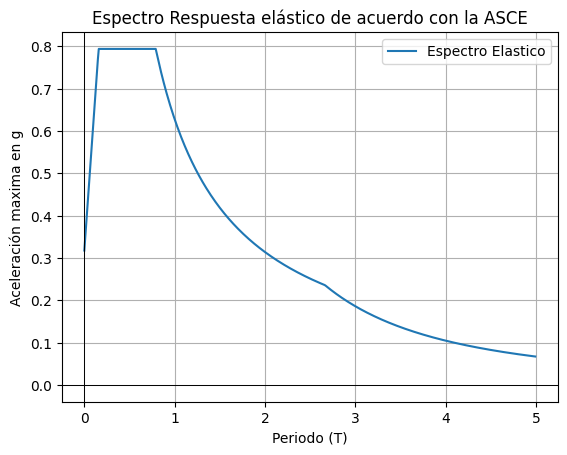

In [31]:
Fv = 1.4  #Ver en ASCE tabla 11.4-2, realizar interpolación si es necesario
Tl = 2.4*fd #Para Ecuador

Spec_ASCE, Tmp = BN.Spec_ASCE7(Tl, fa, Fv, Ss, S1, limite)

fig, ax = plt.subplots()
plt.plot(Spec_ASCE[:,1], Spec_ASCE[:,0], label='Espectro Elastico')
ax.axhline(0, color='black', linewidth=0.7)
ax.axvline(0, color='black', linewidth=0.7)
plt.title('Espectro Respuesta elástico de acuerdo con la ASCE')
plt.xlabel('Periodo (T)')
plt.ylabel('Aceleración maxima en g')
plt.legend()
plt.grid(True)
plt.show

In [32]:
tbl_Spec_ASCE = pd.DataFrame(Spec_ASCE)
display(tbl_Spec_ASCE.style.set_caption('Sa_ASCE_Espectro Inelastico'))

,0,1
0,0.317440,0.000000
1,0.347554,0.010000
2,0.377668,0.020000
3,0.407782,0.030000
4,0.437896,0.040000
5,0.468010,0.050000
6,0.498124,0.060000
7,0.528238,0.070000
8,0.558351,0.080000
9,0.588465,0.090000
